In [43]:
# Python
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# Load the npz file
# npz_file_path = "/home/kjell/Documents/Repositories/Soar_EnvGen/wind_fields/run_20240609_224721_buildings/flow_field_data_50.npz"
# npz_file_path = "/home/kjell/Documents/Repositories/Soar_EnvGen/wind_fields/run_20240908_164926_TU_Delft_campus/flow_field_data_100.npz"
npz_file_path = "/home/kjell/Documents/Repositories/Soar_EnvGen/wind_fields/run_20240908_164528_random_field/flow_field_data_100.npz"
data = np.load(npz_file_path)


In [45]:

# Extract the data
velocity_vectors = data['velocity_vectors']
cell_positions = data['cell_positions']


In [61]:
drone_position = np.array([-34, 0, 42])

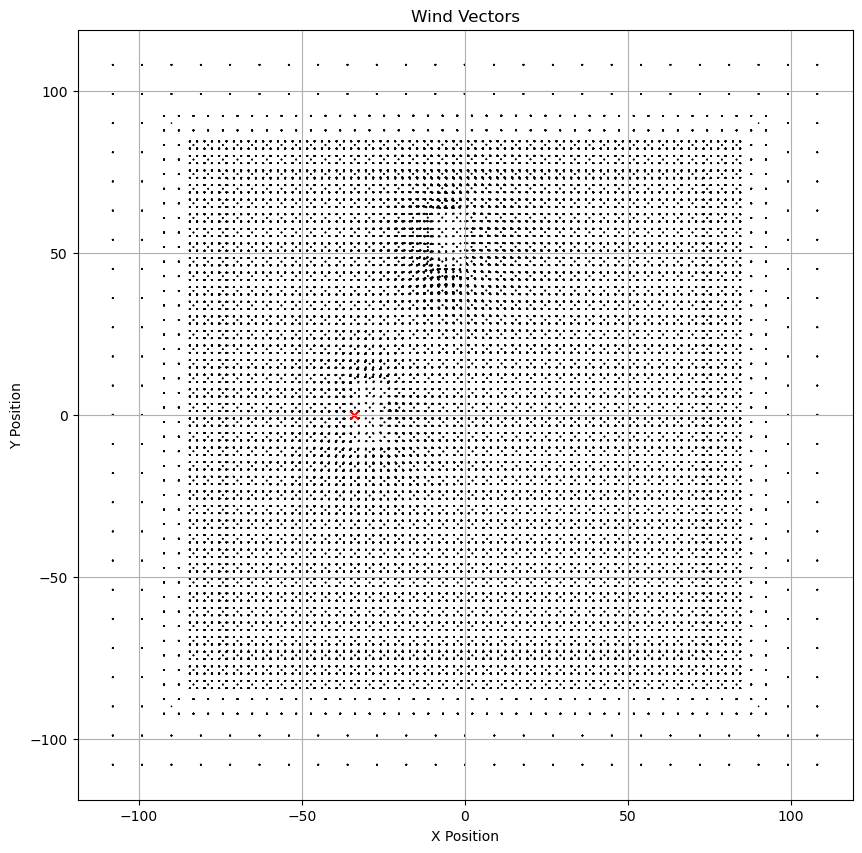

In [60]:

# Plot the data points
plt.figure(figsize=(10, 10))
plt.quiver(cell_positions[:, 0], cell_positions[:, 1], velocity_vectors[:, 0], velocity_vectors[:, 1])
plt.scatter(drone_position[0], drone_position[1], c='r', marker='x', label='Drone Position')
plt.title('Wind Vectors')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.show()



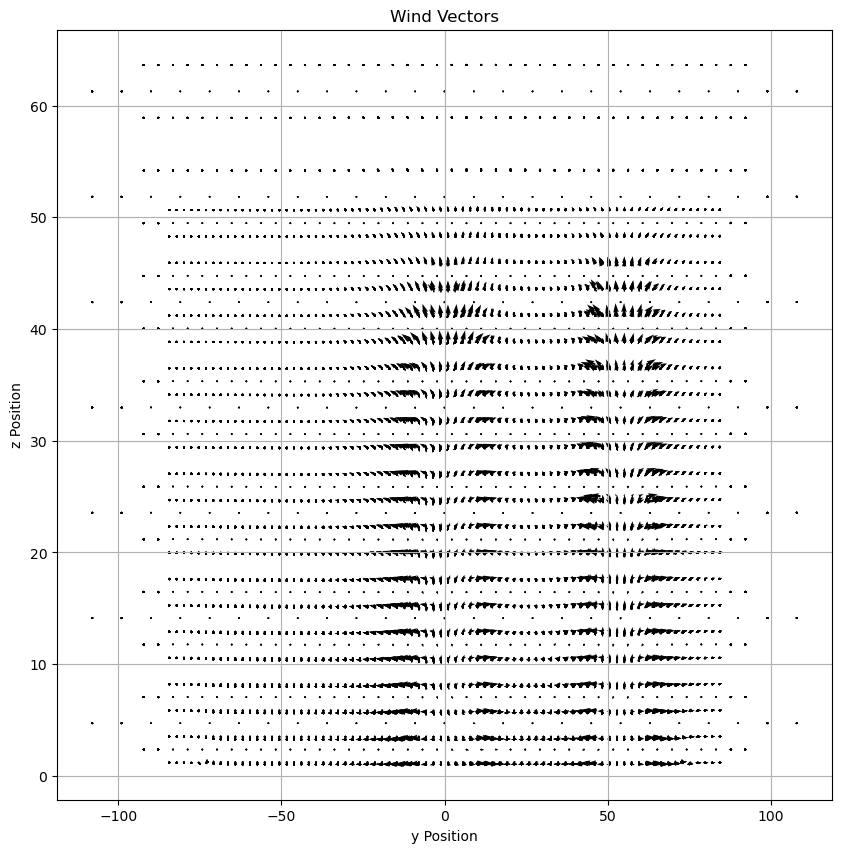

In [62]:


# Plot the data points
plt.figure(figsize=(10, 10))
plt.quiver(cell_positions[:, 1], cell_positions[:, 2], velocity_vectors[:, 1], velocity_vectors[:, 2])
plt.title('Wind Vectors')
plt.xlabel('y Position')
plt.ylabel('z Position')
plt.grid(True)
plt.show()



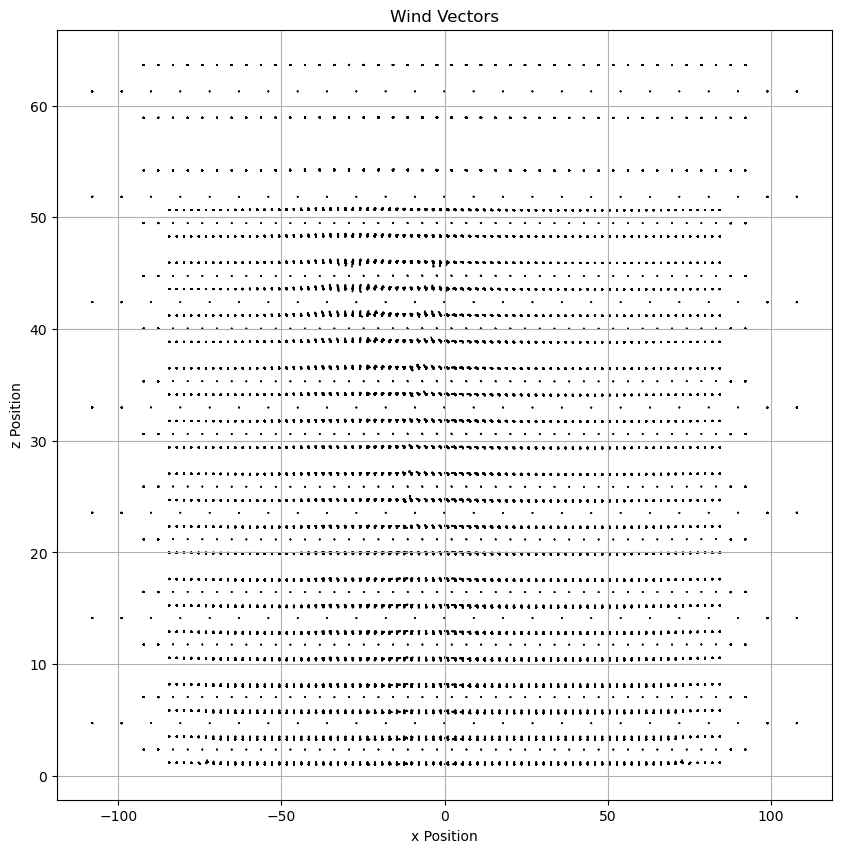

In [48]:


# Plot the data points
plt.figure(figsize=(10, 10))
plt.quiver(cell_positions[:, 0], cell_positions[:, 2], velocity_vectors[:, 0], velocity_vectors[:, 2])
plt.title('Wind Vectors')
plt.xlabel('x Position')
plt.ylabel('z Position')
plt.grid(True)
plt.show()



In [49]:
print(cell_positions[100000])
print(100000/len(cell_positions))
print(type(cell_positions[0][0]))
print(cell_positions[100000][0])

[-1.04928  7.88984 34.1547 ]
0.7359326474441059
<class 'numpy.float64'>
-1.04928


In [50]:
from scipy.spatial import KDTree

In [66]:
# Step 1: Build a KD-Tree from cell positions
kd_tree = KDTree(cell_positions)


# drone_position = [363.051 , 508.667 , -28.1428]
# Step 2: Define the drone's current position
# drone_position = np.array([300, 232, 34])


# Step 3: Query the KD-Tree to find the nearest neighbor(s)
# Here, k=1 will give you the closest point; use k=2 or more if you want multiple neighbors for interpolation
print("Starting query")
distance, index = kd_tree.query(drone_position, k=4)
print("Query done")
# Step 4: Retrieve the closest cell position and corresponding wind vector
closest_position = cell_positions[index]
print(closest_position)
closest_wind_vector = velocity_vectors[index]
print(closest_wind_vector)

Starting query
Query done
[[-35.0568    1.11065  41.3155 ]
 [-35.0551   -1.14792  41.3168 ]
 [-32.7036    1.14677  41.2442 ]
 [-32.6896   -1.14399  41.2435 ]]
[[10.4077   -0.276554 12.2738  ]
 [10.5014   -1.6444   12.209   ]
 [11.324     0.809439  7.35175 ]
 [11.8436   -2.29784   7.20857 ]]


In [52]:
print("Starting query")
distance, index = kd_tree.query(drone_position, k=4)
print("Query done")
# Step 4: Retrieve the closest cell position and corresponding wind vector
closest_position = cell_positions[index]
print(closest_position)

Starting query
Query done
[[107.999  108.      32.9887]
 [107.999  108.      42.4184]
 [107.999  108.      23.5611]
 [107.999  108.      51.8498]]


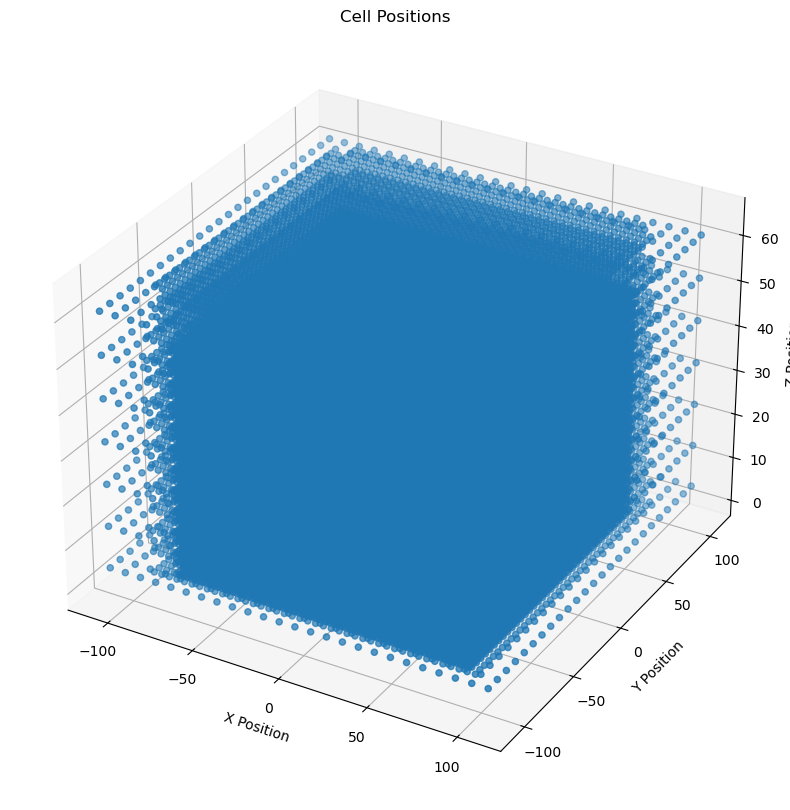

In [53]:
# Python
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Assuming cell_positions is a 2D array with 3 columns for x, y, and z coordinates
ax.scatter(cell_positions[:, 0], cell_positions[:, 1], cell_positions[:, 2])

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
plt.title('Cell Positions')
plt.show()